# Price_in_lakhs is target variable 

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

import warnings
warnings.filterwarnings("ignore")


In [2]:
ihp = pd.read_csv("india_housing_prices.csv")
ihp.head(1)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1.0,Tamil Nadu,Chennai,Locality_84,Apartment,1.0,4740.0,489.76,0.1,1990.0,Furnished,22.0,1.0,35.0,10.0,3.0,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move


In [3]:
ihp[ihp.Property_Type=="Apartment"].head(1)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1.0,Tamil Nadu,Chennai,Locality_84,Apartment,1.0,4740.0,489.76,0.1,1990.0,Furnished,22.0,1.0,35.0,10.0,3.0,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move


In [4]:
ihp[ihp.duplicated()] #Duplicates

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status


In [5]:
ihp.shape

(250000, 23)

In [6]:
ihp.Price_in_Lakhs.dropna(inplace=True)

In [7]:
ihp.Price_in_Lakhs.isnull().sum()

np.int64(1535)

In [8]:
ihp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              249993 non-null  float64
 1   State                           249477 non-null  object 
 2   City                            249439 non-null  object 
 3   Locality                        249067 non-null  object 
 4   Property_Type                   248926 non-null  object 
 5   BHK                             248975 non-null  float64
 6   Size_in_SqFt                    248399 non-null  float64
 7   Price_in_Lakhs                  248465 non-null  float64
 8   Price_per_SqFt                  248679 non-null  float64
 9   Year_Built                      248641 non-null  float64
 10  Furnished_Status                248141 non-null  object 
 11  Floor_No                        248649 non-null  float64
 12  Total_Floors    

In [9]:
ihp.shape[0]

250000

# Null values 

In [10]:
ihp.isnull().sum()/ihp.shape[0]*100

ID                                0.0028
State                             0.2092
City                              0.2244
Locality                          0.3732
Property_Type                     0.4296
BHK                               0.4100
Size_in_SqFt                      0.6404
Price_in_Lakhs                    0.6140
Price_per_SqFt                    0.5284
Year_Built                        0.5436
Furnished_Status                  0.7436
Floor_No                          0.5404
Total_Floors                      0.5344
Age_of_Property                   0.5336
Nearby_Schools                    0.5232
Nearby_Hospitals                  0.5188
Public_Transport_Accessibility    0.4472
Parking_Space                     0.2620
Security                          0.2132
Amenities                         0.1576
Facing                            0.1228
Owner_Type                        0.1192
Availability_Status               0.0908
dtype: float64

# Dropping ID

In [11]:
ihp.drop("ID",axis=1,inplace=True)

In [12]:
ihp.head(1)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Locality_84,Apartment,1.0,4740.0,489.76,0.1,1990.0,Furnished,22.0,1.0,35.0,10.0,3.0,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move


In [13]:
ihp.describe()

,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,248975.000000,248399.000000,248465.000000,248679.000000,248641.000000,248649.000000,248664.000000,248666.000000,248692.000000,248703.000000
mean,2.999755,2749.956960,254.585097,0.130589,2006.523437,14.965449,15.505111,18.476708,5.499244,5.498546
std,1.415538,1300.651337,141.349250,0.130737,9.807668,8.948514,8.670781,9.807776,2.878231,2.871952
min,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,1623.000000,132.540000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,3.000000,2747.000000,253.830000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,4.000000,3874.000000,376.890000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


# Dropping rows with null value of target varibales 

In [14]:
drop=ihp[ihp.Price_in_Lakhs.isnull()==True].index

In [15]:
drop

Index([     3,      4,      5,      6,      7,      8,      9,     10,     11,
           12,
       ...
       125956, 125957, 125958, 125959, 125960, 125961, 125962, 125963, 125964,
       125965],
      dtype='int64', length=1535)

In [16]:
ihp.drop(drop,inplace=True)

In [17]:
ihp.shape

(248465, 22)

In [18]:
ihp.reset_index(inplace=True)

# boxplot and distribution

In [19]:
ihp.drop("index",axis=1,inplace=True)

BHK


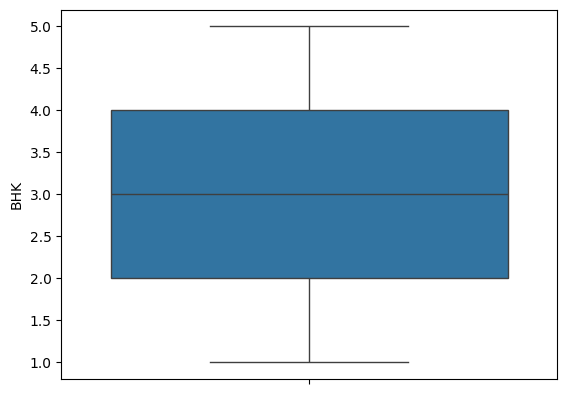

Size_in_SqFt


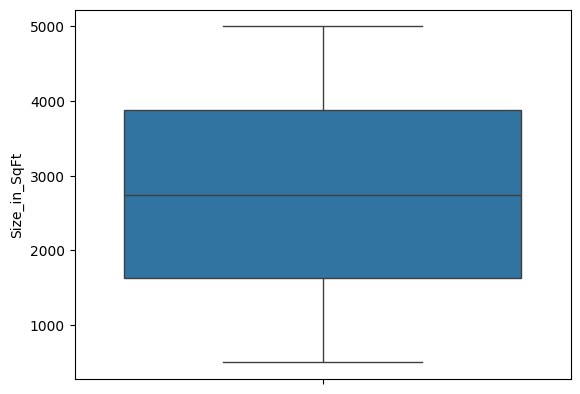

Price_in_Lakhs


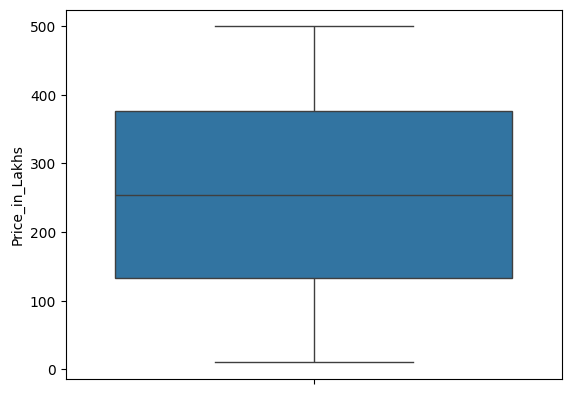

Price_per_SqFt


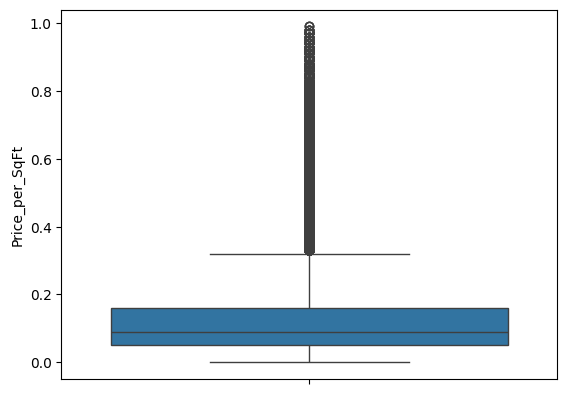

Year_Built


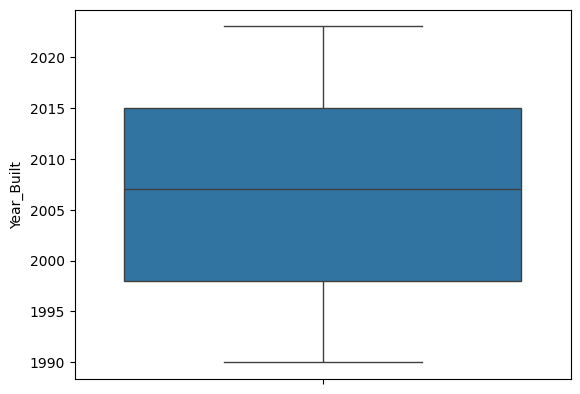

Floor_No


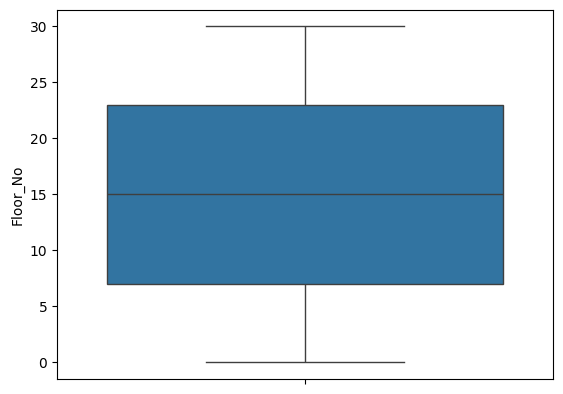

Total_Floors


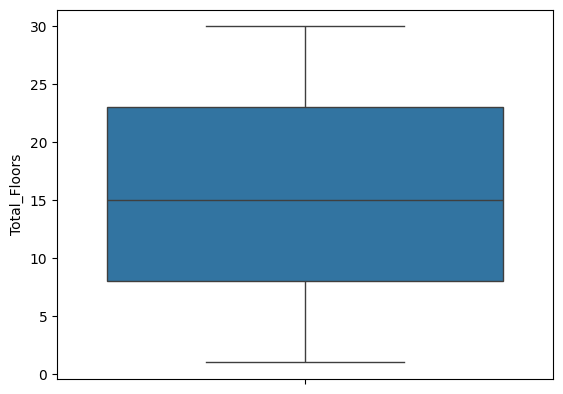

Age_of_Property


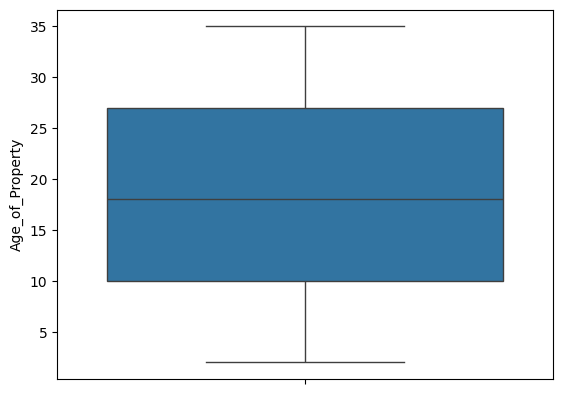

Nearby_Schools


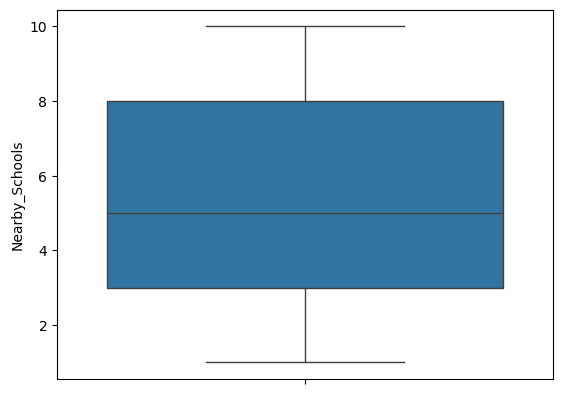

Nearby_Hospitals


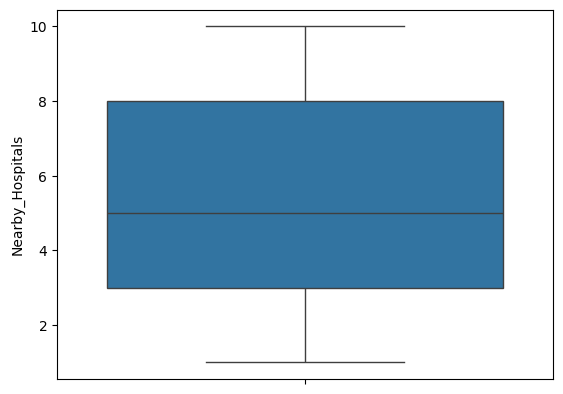

CPU times: total: 5.39 s
Wall time: 6.28 s


In [20]:
%%time
for i in ihp.select_dtypes(exclude="object"):
    print(i)
    sns.boxplot(ihp[i])
    plt.show()

# Checking Duplicates 

In [21]:
ihp[ihp.duplicated()]

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status


# Distribution of categorical data 

In [22]:
ihp.Owner_Type.value_counts(normalize=True)*100

Owner_Type
Broker     33.387014
Builder    33.310519
Owner      33.302467
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='State'>

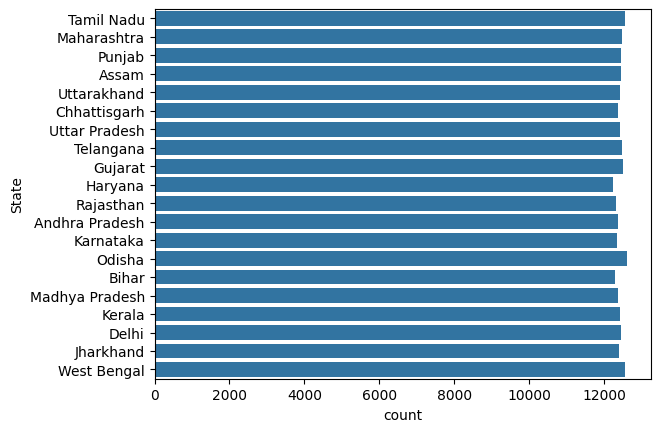

In [23]:
sns.countplot(y=ihp.State)

<Axes: xlabel='Floor_No', ylabel='Age_of_Property'>

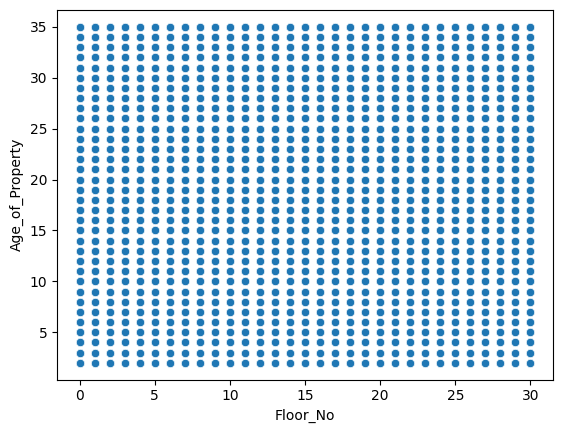

In [24]:
sns.scatterplot(x=ihp.Floor_No,y=ihp.Age_of_Property)

<Axes: >

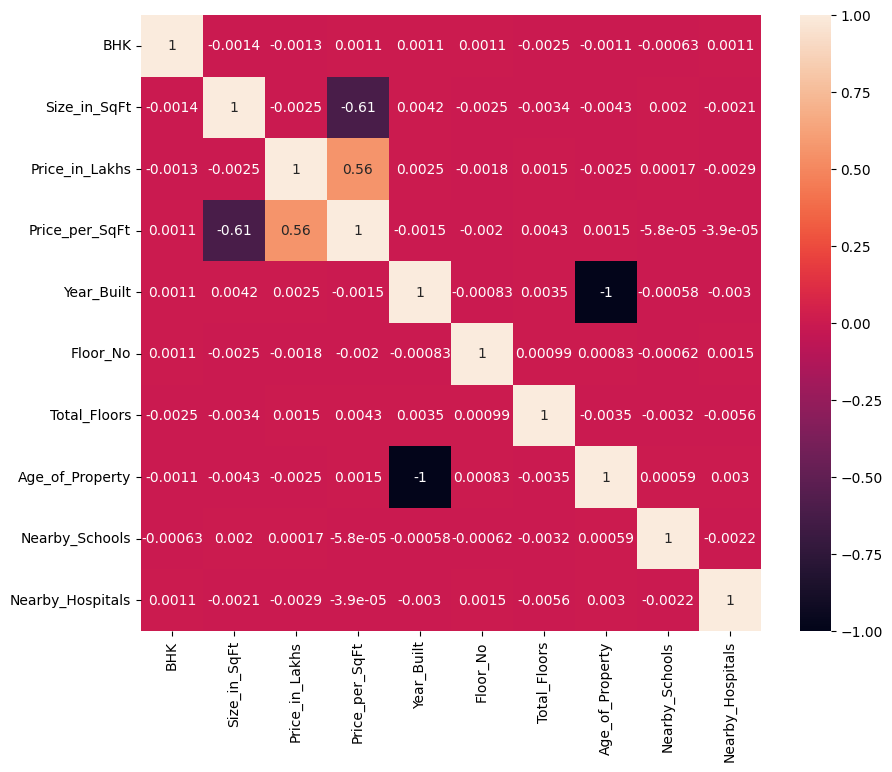

In [25]:
plt.figure(figsize=[10,8])
sns.heatmap(ihp.select_dtypes(exclude="object").corr(),annot=True)

<Axes: xlabel='Floor_No', ylabel='Price_in_Lakhs'>

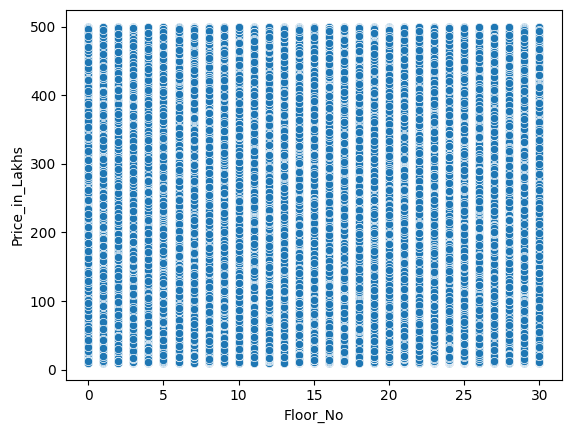

In [26]:
sns.scatterplot(y=ihp.Price_in_Lakhs,x = ihp.Floor_No)

# Data cleaning 

In [27]:
ihp.head(1)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Locality_84,Apartment,1.0,4740.0,489.76,0.1,1990.0,Furnished,22.0,1.0,35.0,10.0,3.0,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move


In [28]:
ihp.isnull().sum()


State                               0
City                                6
Locality                            0
Property_Type                       0
BHK                                 0
Size_in_SqFt                      306
Price_in_Lakhs                      0
Price_per_SqFt                     97
Year_Built                        126
Furnished_Status                  345
Floor_No                          132
Total_Floors                      126
Age_of_Property                   128
Nearby_Schools                    127
Nearby_Hospitals                  128
Public_Transport_Accessibility    111
Parking_Space                     123
Security                          109
Amenities                         106
Facing                             84
Owner_Type                         81
Availability_Status                74
dtype: int64

# Fill null values in State 

In [29]:
ihp.State.fillna(ihp.State.mode()[0],inplace=True)

# filling null values 

In [30]:
ihp.City.fillna(ihp.City.mode()[0],inplace=True)

In [31]:
ihp["Size_in_SqFt"].fillna(ihp["Size_in_SqFt"].mean(),inplace=True)

In [32]:
ihp["Age_of_Property"].fillna(ihp["Age_of_Property"].mean(),inplace=True)

In [33]:
ihp.isnull().sum()

State                               0
City                                0
Locality                            0
Property_Type                       0
BHK                                 0
Size_in_SqFt                        0
Price_in_Lakhs                      0
Price_per_SqFt                     97
Year_Built                        126
Furnished_Status                  345
Floor_No                          132
Total_Floors                      126
Age_of_Property                     0
Nearby_Schools                    127
Nearby_Hospitals                  128
Public_Transport_Accessibility    111
Parking_Space                     123
Security                          109
Amenities                         106
Facing                             84
Owner_Type                         81
Availability_Status                74
dtype: int64

In [34]:
ihp["Furnished_Status"].fillna(ihp["Furnished_Status"].mode()[0],inplace=True)

In [35]:
ihp["Floor_No"].fillna(ihp["Floor_No"].mean(),inplace=True)

In [36]:
ihp["Owner_Type"].fillna(ihp["Owner_Type"].mode()[0],inplace=True)

In [37]:
ihp["Availability_Status"].fillna(ihp["Availability_Status"].mode()[0],inplace=True)

In [38]:
ihp.isnull().sum()

State                               0
City                                0
Locality                            0
Property_Type                       0
BHK                                 0
Size_in_SqFt                        0
Price_in_Lakhs                      0
Price_per_SqFt                     97
Year_Built                        126
Furnished_Status                    0
Floor_No                            0
Total_Floors                      126
Age_of_Property                     0
Nearby_Schools                    127
Nearby_Hospitals                  128
Public_Transport_Accessibility    111
Parking_Space                     123
Security                          109
Amenities                         106
Facing                             84
Owner_Type                          0
Availability_Status                 0
dtype: int64

In [39]:
ihp.Locality=ihp["Locality"].apply(lambda x:x.split('_')[1])

In [40]:
data = ihp.copy()

In [41]:
X = data.drop("Price_in_Lakhs",axis=1)
y = data.Price_in_Lakhs

In [42]:
xtrain , xtest , ytrain , ytest = train_test_split(X,y,test_size=0.2,random_state=35)

In [43]:
xtrain.State.value_counts(normalize=True)*100

State
Odisha            5.091763
Tamil Nadu        5.078683
Gujarat           5.045982
Maharashtra       5.041958
Punjab            5.018312
Assam             5.018312
Uttarakhand       5.004729
Kerala            5.003220
Uttar Pradesh     4.998189
Andhra Pradesh    4.998189
Chhattisgarh      4.996680
Jharkhand         4.996177
West Bengal       4.993661
Karnataka         4.978065
Telangana         4.972028
Delhi             4.971022
Madhya Pradesh    4.968507
Bihar             4.950899
Rajasthan         4.945365
Haryana           4.928260
Name: proportion, dtype: float64

In [44]:
xtrain.City.nunique()

42

# outlier treatment in train data 

In [45]:
for i in xtrain.select_dtypes(include=np.number):
    q1=xtrain[i].quantile(0.25)
    q3=xtrain[i].quantile(0.75)
    iqr= q3-q1
    u=q3+1.5*(iqr)
    l=q1-1.5*(iqr)
    xtrain[i]=xtrain[i].clip(lower=l,upper=u)

# Encoding 

In [46]:
xtrain.Parking_Space.unique()

array(['No', 'Yes', nan], dtype=object)

In [47]:
xtest.Parking_Space=xtest.Parking_Space.apply(lambda x:1 if x=="Yes" else 0)
xtrain.Parking_Space=xtrain.Parking_Space.apply(lambda x:1 if x=="Yes" else 0)





In [48]:
xtest.Security=xtest.Security.apply(lambda x:1 if x=="Yes" else 0)
xtrain.Security=xtrain.Security.apply(lambda x:1 if x=="Yes" else 0)


# Convert locality into int 

In [49]:
xtrain.Locality=xtrain.Locality.astype(np.number)

d:\Back End Development\Machine Learning\.venv\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [50]:
xtrain.Availability_Status.unique()

array(['Under_Construction', 'Ready_to_Move'], dtype=object)

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
xtrain.Availability_Status=xtrain.Availability_Status.apply(lambda x:1 if x== "Ready_to_Move" else 0  )
xtest.Availability_Status=xtest.Availability_Status.apply(lambda x:1 if x=="Ready_to_Move" else 0  )

In [53]:
xtrain.Public_Transport_Accessibility=xtrain.Public_Transport_Accessibility.apply(lambda x:3 if x=="High" else 2 if x=="Medium" else 1  )
xtest.Public_Transport_Accessibility=xtest.Public_Transport_Accessibility.apply(lambda x:3 if x=="High" else 2 if x=="Medium" else 1 )

In [54]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198772 entries, 231003 to 202441
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           198772 non-null  object 
 1   City                            198772 non-null  object 
 2   Locality                        198772 non-null  float64
 3   Property_Type                   198772 non-null  object 
 4   BHK                             198772 non-null  float64
 5   Size_in_SqFt                    198772 non-null  float64
 6   Price_per_SqFt                  198696 non-null  float64
 7   Year_Built                      198677 non-null  float64
 8   Furnished_Status                198772 non-null  object 
 9   Floor_No                        198772 non-null  float64
 10  Total_Floors                    198677 non-null  float64
 11  Age_of_Property                 198772 non-null  float64
 12  Nearby_Schools  

In [55]:
xtrain.Furnished_Status.unique() 

array(['Unfurnished', 'Semi-furnished', 'Furnished'], dtype=object)

In [56]:
xtrain.Furnished_Status=xtrain.Furnished_Status.apply(lambda x:3 if x=="Furnished" else 2 if x=="Semi-furnished" else 1)

In [57]:
xtest.Furnished_Status=xtest.Furnished_Status.apply(lambda x:3 if x=="Furnished" else 2 if x=="Semi-furnished" else 1)

In [58]:
xtrain.Furnished_Status.unique() # cross checking categories are updated or not 
xtest.Furnished_Status.unique()

array([2, 1, 3])

In [59]:
xtrain.Facing.unique()

array(['East', 'North', 'West', 'South', nan], dtype=object)

In [60]:
g1=pd.concat([xtrain.Facing,ytrain],axis=1).groupby("Facing")["Price_in_Lakhs"].mean()

In [61]:
xtrain.Facing=xtrain.Facing.map(g1)

In [62]:
xtest.Facing=xtest.Facing.map(g1).fillna(np.mean(ytrain))

In [63]:
xtrain.Owner_Type.unique()

array(['Broker', 'Owner', 'Builder'], dtype=object)

In [64]:
v= pd.get_dummies(xtrain.Owner_Type)
v=v.astype(np.number)

d:\Back End Development\Machine Learning\.venv\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [65]:
xtrain=pd.concat([xtrain,v],axis=1)

In [66]:
xtrain.shape

(198772, 24)

In [67]:
b= pd.get_dummies(xtest.Owner_Type)
b=b.astype(np.number)

d:\Back End Development\Machine Learning\.venv\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [68]:
xtest=pd.concat([xtest,b],axis=1)

In [69]:
xtest.shape

(49693, 24)

In [70]:
xtrain.drop("Owner_Type",axis=1,inplace=True)

In [71]:
xtest.drop("Owner_Type",axis=1,inplace=True)

In [72]:
print(xtrain.shape,xtest.shape)

(198772, 23) (49693, 23)


# Encoding for State

In [73]:
state=pd.concat([xtrain.State,ytrain],axis=1).groupby("State")["Price_in_Lakhs"].mean()

In [74]:
xtrain.State=xtrain.State.map(state)

In [75]:
xtest.State=xtest.State.map(state).fillna(np.mean(ytrain))

In [76]:
xtrain.head(1)
xtest.head(1)


,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Availability_Status,Broker,Builder,Owner
96470,252.496326,Raipur,156,Apartment,3.0,4177.0,0.02,1995.0,2,3.0,22.0,30.0,5.0,1.0,2,1,0,"Gym, Garden, Pool, Playground",255.04072,0,1.0,0.0,0.0


# encoding for city 

In [77]:
train_tar_city2=pd.concat([xtrain.City,ytrain],axis=1).groupby("City")["Price_in_Lakhs"].mean()

xtrain.City=xtrain.City.map(train_tar_city2)

xtest.City=xtest.City.map(train_tar_city2).fillna(np.mean(ytrain))

# encoding property type 

In [78]:
property_type=pd.concat([xtrain.Property_Type,ytrain],axis=1).groupby("Property_Type")["Price_in_Lakhs"].mean()

xtrain.Property_Type=xtrain.Property_Type.map(property_type)

xtest.Property_Type=xtest.Property_Type.map(property_type).fillna(np.mean(ytrain))

# Encoding for amineties 

In [79]:
train_tar_Amenities=pd.concat([xtrain.Amenities,ytrain],axis=1).groupby("Amenities")["Price_in_Lakhs"].mean()

xtrain.Amenities=xtrain.Amenities.map(train_tar_Amenities)

xtest.Amenities=xtest.Amenities.map(train_tar_Amenities).fillna(np.mean(ytrain))

In [80]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198772 entries, 231003 to 202441
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           198772 non-null  float64
 1   City                            198772 non-null  float64
 2   Locality                        198772 non-null  float64
 3   Property_Type                   198772 non-null  float64
 4   BHK                             198772 non-null  float64
 5   Size_in_SqFt                    198772 non-null  float64
 6   Price_per_SqFt                  198696 non-null  float64
 7   Year_Built                      198677 non-null  float64
 8   Furnished_Status                198772 non-null  int64  
 9   Floor_No                        198772 non-null  float64
 10  Total_Floors                    198677 non-null  float64
 11  Age_of_Property                 198772 non-null  float64
 12  Nearby_Schools  

In [81]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49693 entries, 96470 to 18327
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           49693 non-null  float64
 1   City                            49693 non-null  float64
 2   Locality                        49693 non-null  object 
 3   Property_Type                   49693 non-null  float64
 4   BHK                             49693 non-null  float64
 5   Size_in_SqFt                    49693 non-null  float64
 6   Price_per_SqFt                  49672 non-null  float64
 7   Year_Built                      49662 non-null  float64
 8   Furnished_Status                49693 non-null  int64  
 9   Floor_No                        49693 non-null  float64
 10  Total_Floors                    49662 non-null  float64
 11  Age_of_Property                 49693 non-null  float64
 12  Nearby_Schools                  4

In [82]:
xtest.Locality=xtest.Locality.astype(np.number)



d:\Back End Development\Machine Learning\.venv\Lib\site-packages\pandas\core\dtypes\common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [83]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49693 entries, 96470 to 18327
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           49693 non-null  float64
 1   City                            49693 non-null  float64
 2   Locality                        49693 non-null  float64
 3   Property_Type                   49693 non-null  float64
 4   BHK                             49693 non-null  float64
 5   Size_in_SqFt                    49693 non-null  float64
 6   Price_per_SqFt                  49672 non-null  float64
 7   Year_Built                      49662 non-null  float64
 8   Furnished_Status                49693 non-null  int64  
 9   Floor_No                        49693 non-null  float64
 10  Total_Floors                    49662 non-null  float64
 11  Age_of_Property                 49693 non-null  float64
 12  Nearby_Schools                  4

In [84]:
xtrain.head(1)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Availability_Status,Broker,Builder,Owner
231003,255.921702,255.86086,94.0,253.881195,5.0,1254.0,0.325,1994.0,1,20.0,18.0,31.0,6.0,1.0,1,0,1,281.35617,254.069543,0,1.0,0.0,0.0


l=["Broker" ,"Builder","Owner"]

for i in l:
    xtrain[i]=xtrain[i].astype(np.number)
    xtest[i]=xtest[i].astype(np.number)
    

In [85]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [86]:
xtrain_c=sm.add_constant(xtrain)

In [87]:
xtest_c=sm.add_constant(xtest)

In [88]:
xtrain_c.Broker

231003    1.0
101840    0.0
140533    1.0
34899     0.0
198211    1.0
         ... 
56300     0.0
179233    0.0
41911     1.0
115983    1.0
202441    0.0
Name: Broker, Length: 198772, dtype: float64

In [89]:
model1=sm.OLS(ytrain,xtrain_c).fit()

MissingDataError: exog contains inf or nans

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price_in_Lakhs   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 2.175e+04
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:17:26   Log-Likelihood:            -1.1500e+06
No. Observations:              199725   AIC:                         2.300e+06
Df Residuals:                  199702   BIC:                         2.300e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            419.7529   1278.998      0.328      0.743   -2087.052    2926.558
State                              0.0895      0.189      0.475      0.635      -0.280       0.459
City                               0.2545      0.131      1.939      0.053      -0.003       0.512
Locality                           0.0018      0.001      1.522      0.128      -0.001       0.004
Property_Type                      0.8787      0.311      2.829      0.005       0.270       1.487
BHK                               -0.1157      0.121     -0.955      0.339      -0.353       0.122
Size_in_SqFt                       0.0788      0.000    451.378      0.000       0.078       0.079
Price_per_SqFt                  1700.9283      2.462    690.813      0.000    1696.102    1705.754
Year_Built                        -0.5776      0.840     -0.687      0.492      -2.225       1.070
Furnished_Status                  -0.0206      0.210     -0.098      0.922      -0.432       0.391
Floor_No                           0.0132      0.019      0.691      0.490      -0.024       0.051
Total_Floors                      -0.0204      0.020     -1.033      0.302      -0.059       0.018
Age_of_Property                   -0.5933      0.841     -0.706      0.480      -2.241       1.054
Nearby_Schools                     0.0521      0.060      0.875      0.382      -0.065       0.169
Nearby_Hospitals                  -0.0536      0.060     -0.897      0.370      -0.171       0.063
Public_Transport_Accessibility     0.2639      0.210      1.258      0.209      -0.147       0.675
Parking_Space                      0.5370      0.343      1.566      0.117      -0.135       1.209
Security                           0.5756      0.343      1.679      0.093      -0.097       1.248
Amenities                          0.3140      0.032      9.915      0.000       0.252       0.376
Facing                             0.2177      0.259      0.841      0.400      -0.290       0.725
Availability_Status                0.4238      0.343      1.236      0.216      -0.248       1.096
Broker                           139.7826    426.332      0.328      0.743    -695.818     975.383
Builder                          140.2446    426.333      0.329      0.742    -695.358     975.848
Owner                            139.7258    426.333      0.328      0.743    -695.876     975.328
==============================================================================
Omnibus:                    10206.353   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11861.834
Skew:                          -0.596   Prob(JB):                         0.00
Kurtosis:                       2.953   Cond. No.                     2.45e+18
===============

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
r2_score(ytest,model1.predict(xtest_c)) #test data

0.10802500231638024

In [ ]:
mean_absolute_error(ytest,model1.predict(xtest_c))

82.9182928217204

In [ ]:
mean_absolute_error(ytrain,model1.predict(xtrain_c))

61.168086926955745

In [ ]:
l = [vif(xtrain_c,i) for i in range(xtrain_c.shape[1])]
pd.DataFrame(l,index=xtrain_c.columns,columns=["VIF"]).sort_values(by="VIF",ascending=False)

,VIF
Owner,inf
Broker,inf
Builder,inf
Age_of_Property,2313.780100
Year_Built,2313.779641
City,1.930962
State,1.930869
Price_per_SqFt,1.753125
Size_in_SqFt,1.752146
Amenities,1.001100


In [ ]:
xtrain_c.drop("Owner",axis=1,inplace=True)

In [ ]:
l = [vif(xtrain_c,i) for i in range(xtrain_c.shape[1])]
pd.DataFrame(l,index=xtrain_c.columns,columns=["VIF"]).sort_values(by="VIF",ascending=False)

,VIF
const,9.893581e+07
Age_of_Property,2.313780e+03
Year_Built,2.313780e+03
City,1.930962e+00
State,1.930869e+00
Price_per_SqFt,1.753125e+00
Size_in_SqFt,1.752146e+00
Broker,1.333570e+00
Builder,1.333517e+00
Amenities,1.001100e+00


In [ ]:
xtrain_c.drop("Year_Built",axis=1,inplace=True)

In [ ]:
l = [vif(xtrain_c,i) for i in range(xtrain_c.shape[1])]
pd.DataFrame(l,index=xtrain_c.columns,columns=["VIF"]).sort_values(by="VIF",ascending=False)

,VIF
const,402095.532502
City,1.930952
State,1.930841
Price_per_SqFt,1.753050
Size_in_SqFt,1.752122
Broker,1.333568
Builder,1.333514
Amenities,1.001100
Total_Floors,1.000146
Floor_No,1.000142


In [ ]:
xtrain_c.columns

Index(['const', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_per_SqFt', 'Furnished_Status', 'Floor_No',
       'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security',
       'Amenities', 'Facing', 'Availability_Status', 'Broker', 'Builder'],
      dtype='object')

In [ ]:
model2 = sm.OLS(ytrain,xtrain_c).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price_in_Lakhs   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 2.278e+04
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:17:42   Log-Likelihood:            -1.1500e+06
No. Observations:              199725   AIC:                         2.300e+06
Df Residuals:                  199703   BIC:                         2.300e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -610.0149    108.717     -5.611      0.000    -823.097    -396.933
State                              0.0890      0.189      0.472      0.637      -0.281       0.458
City                               0.2547      0.131      1.941      0.052      -0.003       0.512
Locality                           0.0018      0.001      1.522      0.128      -0.001       0.004
Property_Type                      0.8784      0.311      2.828      0.005       0.270       1.487
BHK                               -0.1155      0.121     -0.953      0.340      -0.353       0.122
Size_in_SqFt                       0.0788      0.000    451.379      0.000       0.078       0.079
Price_per_SqFt                  1700.9172      2.462    690.824      0.000    1696.091    1705.743
Furnished_Status                  -0.0201      0.210     -0.096      0.924      -0.431       0.391
Floor_No                           0.0132      0.019      0.690      0.490      -0.024       0.051
Total_Floors                      -0.0205      0.020     -1.034      0.301      -0.059       0.018
Age_of_Property                   -0.0157      0.017     -0.899      0.368      -0.050       0.019
Nearby_Schools                     0.0521      0.060      0.875      0.381      -0.065       0.169
Nearby_Hospitals                  -0.0537      0.060     -0.898      0.369      -0.171       0.063
Public_Transport_Accessibility     0.2639      0.210      1.257      0.209      -0.147       0.675
Parking_Space                      0.5369      0.343      1.566      0.117      -0.135       1.209
Security                           0.5757      0.343      1.679      0.093      -0.096       1.248
Amenities                          0.3140      0.032      9.915      0.000       0.252       0.376
Facing                             0.2179      0.259      0.842      0.400      -0.290       0.725
Availability_Status                0.4239      0.343      1.236      0.216      -0.248       1.096
Broker                             0.0572      0.420      0.136      0.892      -0.766       0.880
Builder                            0.5184      0.420      1.234      0.217      -0.305       1.342
==============================================================================
Omnibus:                    10206.713   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11862.303
Skew:                          -0.597   Prob(JB):                         0.00
Kurtosis:                       2.953   Cond. No.                     1.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,

In [ ]:
model2.predict(xtrain_c)

119941    216.288743
144142    174.109141
114766    342.411361
9596      239.748186
34605      61.943357
             ...    
56300     470.347040
179233    254.416641
41911     201.430049
115983    263.639120
202441     80.824963
Length: 199725, dtype: float64

Text(0, 0.5, 'Error terms')

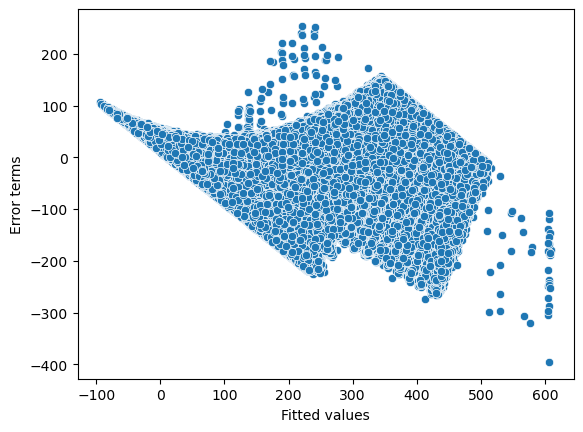

In [ ]:
sns.scatterplot(x=model2.predict(xtrain_c),y=model2.resid)
plt.xlabel("Fitted values")
plt.ylabel("Error terms")

In [ ]:
import statsmodels.stats.api as ssa

In [ ]:
ssa.het_breuschpagan(model2.resid,model2.model.exog)[2::]

(969.3284430454607, 0.0)

In [ ]:
# IF the 2 value is greater than 0.05 it is homosekcadtic 
# else heteroskadastic 

In [ ]:
from sklearn.preprocessing import StandardScaler # for scaling 

In [ ]:
s=StandardScaler()

In [ ]:
for i in xtrain.columns:
    xtrain[i]=s.fit_transform(xtrain[[i]])
    xtest[i]=s.transform(xtest[[i]])
    

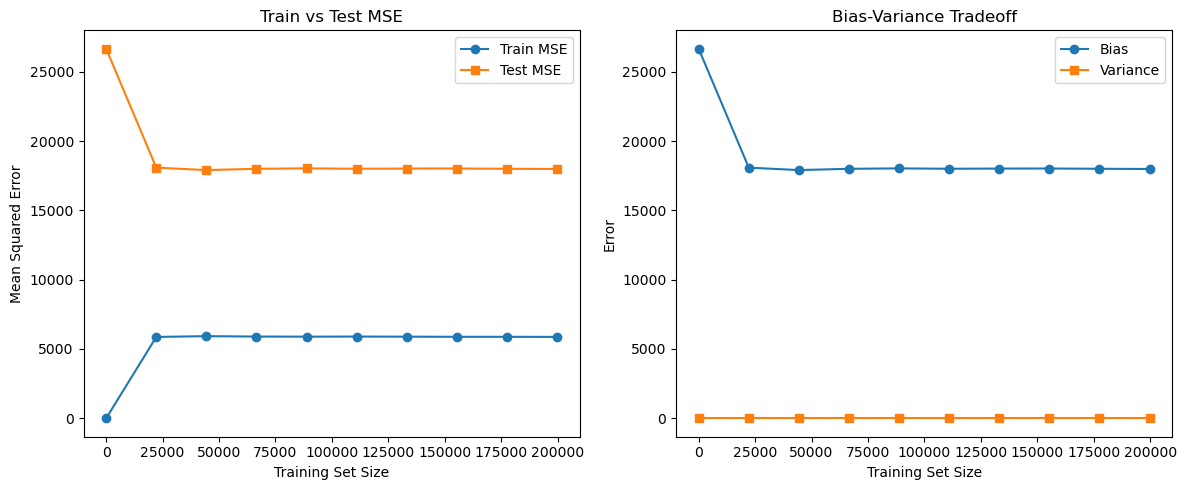

In [ ]:

from sklearn.linear_model import LinearRegression

train_mse = []
test_mse = []
bias = []
variance = []


train_sizes = np.linspace(10, len(xtrain), 10, dtype=int)

for size in train_sizes:
    mse_list = []  
    y_pred_list = []  
    
    for _ in range(20):  
        X_sub, y_sub = xtrain[:size], ytrain[:size]
        model = LinearRegression()
        model.fit(X_sub, y_sub)
        
        y_pred = model.predict(xtest)
        mse = mean_squared_error(ytest, y_pred)
        
        mse_list.append(mse)
        y_pred_list.append(y_pred)
    
    
    y_pred_avg = np.mean(y_pred_list, axis=0)
    bias.append(np.mean((ytest - y_pred_avg) ** 2))
    variance.append(np.mean(np.var(y_pred_list, axis=0)))


    model.fit(xtrain[:size], ytrain[:size])
    train_mse.append(mean_squared_error(ytrain[:size], model.predict(xtrain[:size])))
    test_mse.append(mean_squared_error(ytest, model.predict(xtest)))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mse, label='Train MSE', marker='o')
plt.plot(train_sizes, test_mse, label='Test MSE', marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_sizes, bias, label='Bias', marker='o')
plt.plot(train_sizes, variance, label='Variance', marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
xtrain2 = xtrain.copy()

In [ ]:
xtest2 = xtest.copy()

In [ ]:
p = PolynomialFeatures(degree=3)

In [ ]:
xtrain = p.fit_transform(xtrain)
xtest = p.transform(xtest)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
r2_score(ytest,lr.predict(xtest))

-3.328470952398663e+18